In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df

,date,day,period,nswprice,nswdemand,vicprice,vicdemand,transfer,class
0,0.469625,6,0.617021,0.054822,0.497769,0.003727,0.532626,0.245175,1
1,0.009867,2,0.787234,0.041732,0.751860,0.003467,0.422915,0.414912,0
2,0.877129,3,0.829787,0.035097,0.530943,0.002441,0.506732,0.282018,0
3,0.469891,5,0.702128,0.069563,0.741297,0.004817,0.581564,0.353070,0
4,0.893677,1,0.148936,0.031374,0.200684,0.001909,0.315898,0.779825,0
...,...,...,...,...,...,...,...,...,...
36244,0.889651,1,0.170213,0.027081,0.127343,0.001764,0.258156,0.694298,0
36245,0.893589,6,0.574468,0.077519,0.613805,0.005127,0.636199,0.470175,0
36246,0.425202,5,0.212766,0.073856,0.246504,0.003467,0.422915,0.414912,1
36247,0.022477,2,0.829787,0.076018,0.453139,0.003467,0.422915,0.414912,0


In [4]:
df.describe()

,date,day,period,nswprice,nswdemand,vicprice,vicdemand,transfer,class
count,36249.000000,36249.000000,36249.000000,36249.000000,36249.000000,36249.000000,36249.000000,36249.000000,36249.000000
mean,0.498926,4.002455,0.500055,0.057858,0.425680,0.003492,0.422827,0.500508,0.424536
std,0.339855,1.999081,0.294537,0.039475,0.163622,0.011049,0.121357,0.153032,0.494279
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.031945,2.000000,0.255319,0.035097,0.309134,0.002277,0.371569,0.414912,0.000000
50%,0.456351,4.000000,0.510638,0.048607,0.443916,0.003467,0.422915,0.414912,0.000000
75%,0.880536,6.000000,0.744681,0.074517,0.536150,0.003467,0.469705,0.605702,1.000000
max,1.000000,7.000000,1.000000,1.000000,0.980809,1.000000,1.000000,1.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36249 entries, 0 to 36248
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       36249 non-null  float64
 1   day        36249 non-null  int64  
 2   period     36249 non-null  float64
 3   nswprice   36249 non-null  float64
 4   nswdemand  36249 non-null  float64
 5   vicprice   36249 non-null  float64
 6   vicdemand  36249 non-null  float64
 7   transfer   36249 non-null  float64
 8   class      36249 non-null  int64  
dtypes: float64(7), int64(2)
memory usage: 2.5 MB


In [6]:
df2=pd.read_csv('test.csv')

In [7]:
df2

,date,day,period,nswprice,nswdemand,vicprice,vicdemand,transfer
0,0.424760,2,0.702128,0.058394,0.416989,0.003467,0.422915,0.414912
1,0.017920,4,0.489362,0.066140,0.497322,0.003467,0.422915,0.414912
2,0.912305,5,0.489362,0.080371,0.513240,0.005509,0.650181,0.260088
3,0.429715,3,0.021277,0.049838,0.300803,0.003467,0.422915,0.414912
4,0.465112,1,0.872340,0.056113,0.372508,0.003824,0.349819,0.451316
...,...,...,...,...,...,...,...,...
9058,0.469183,3,0.276596,0.055572,0.444808,0.003683,0.548162,0.317982
9059,0.469758,2,0.191489,0.040681,0.200982,0.002746,0.190057,0.576754
9060,0.868192,5,0.297872,0.027591,0.499256,0.001739,0.506473,0.748246
9061,0.013141,7,0.531915,0.041401,0.331300,0.003467,0.422915,0.414912


In [8]:
df3 = pd.concat([df, df2], ignore_index=True)

In [9]:
df3.shape

(45312, 9)

In [10]:
df3.describe()

,date,day,period,nswprice,nswdemand,vicprice,vicdemand,transfer,class
count,45312.000000,45312.000000,45312.000000,45312.000000,45312.000000,45312.000000,45312.000000,45312.000000,36249.000000
mean,0.499080,4.003178,0.500000,0.057868,0.425418,0.003467,0.422915,0.500526,0.424536
std,0.340308,1.998695,0.294756,0.039991,0.163323,0.010213,0.120965,0.153373,0.494279
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.031934,2.000000,0.250000,0.035127,0.309134,0.002277,0.372346,0.414912,0.000000
50%,0.456329,4.000000,0.500000,0.048652,0.443693,0.003467,0.422915,0.414912,0.000000
75%,0.880547,6.000000,0.750000,0.074336,0.536001,0.003467,0.469252,0.605702,1.000000
max,1.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
df3['class'].value_counts()

class
0.0    20860
1.0    15389
Name: count, dtype: int64

In [12]:
df3['class'].value_counts(normalize = True) * 100

class
0.0    57.546415
1.0    42.453585
Name: proportion, dtype: float64

In [13]:
train = df[df['class'].notnull()]
test = df[df['class'].isnull()]

In [14]:
test = test.drop(columns = 'class')

In [15]:
X = train.drop(columns = 'class')
y = train['class']

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,stratify = y,random_state = 17)

In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential([
    Dense(100, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(50, activation='relu'),
    Dense(1, activation='sigmoid')  
])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               900       
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 6001 (23.44 KB)
Trainable params: 6001 (23.44 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Epoch 1/50


635/635 [==============================] - 4s 4ms/step - loss: 0.6152 - accuracy: 0.6595 - val_loss: 0.5728 - val_accuracy: 0.7031
Epoch 2/50
635/635 [==============================] - 2s 4ms/step - loss: 0.5518 - accuracy: 0.7204 - val_loss: 0.5226 - val_accuracy: 0.7466
Epoch 3/50
635/635 [==============================] - 2s 4ms/step - loss: 0.5132 - accuracy: 0.7519 - val_loss: 0.5071 - val_accuracy: 0.7525
Epoch 4/50
635/635 [==============================] - 2s 4ms/step - loss: 0.4976 - accuracy: 0.7629 - val_loss: 0.4797 - val_accuracy: 0.7724
Epoch 5/50
635/635 [==============================] - 2s 4ms/step - loss: 0.4904 - accuracy: 0.7648 - val_loss: 0.4710 - val_accuracy: 0.7773
Epoch 6/50
635/635 [==============================] - 2s 4ms/step - loss: 0.4863 - accuracy: 0.7658 - val_loss: 0.4764 - val_accuracy: 0.7734
Epoch 7/50
635/635 [==============================] - 3s 5ms/step - loss: 0.4822 - accuracy: 0.7651 - val_loss: 0.4790 - val_accuracy: 0.7673
Epoc

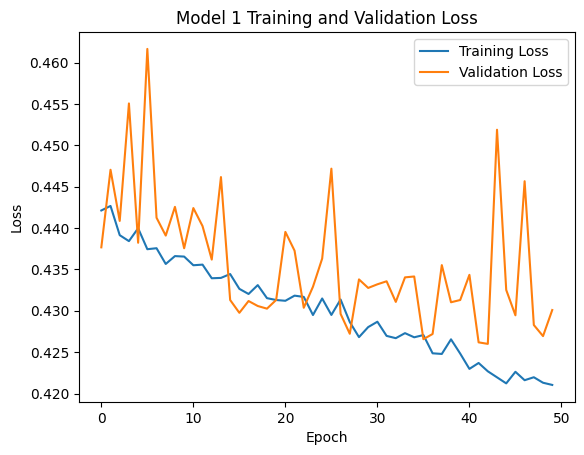

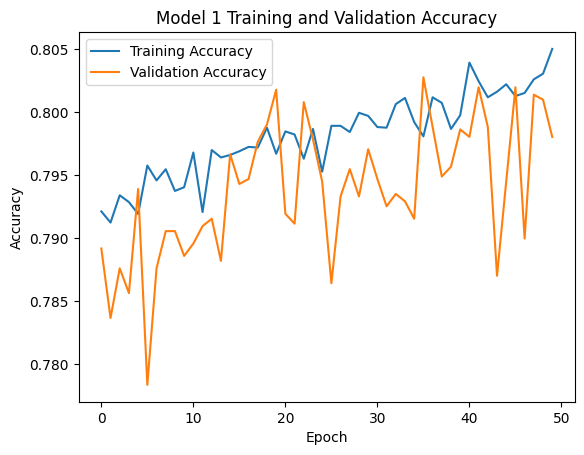

In [20]:
import os
import timeit
import matplotlib.pyplot as plt
# Create a new folder named "images" if it doesn't exist
if not os.path.exists("images"):
    os.makedirs("images")

def train_model():
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)
    return history

execution_time = timeit.timeit(train_model, number=1)
print("Total execution time:", execution_time, "seconds")

history = train_model()

loss1, accuracy1 = model.evaluate(X_test, y_test)
print("Test Loss:", loss1)
print("Test Accuracy:", accuracy1)

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model 1 Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.savefig(os.path.join("images", 'model 1 training_validation_loss.png'))
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model 1 Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.savefig(os.path.join("images", 'model 1 training_validation_accuracy.png'))
plt.show()


### Increasing the Dense Layer

In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential([
    Dense(100, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(50, activation='relu'),
    Dense(50, activation='relu'),  
    Dense(25, activation='relu'),  
    Dense(1, activation='sigmoid') 
])


In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               900       
                                                                 
 dense_4 (Dense)             (None, 50)                5050      
                                                                 
 dense_5 (Dense)             (None, 50)                2550      
                                                                 
 dense_6 (Dense)             (None, 25)                1275      
                                                                 
 dense_7 (Dense)             (None, 1)                 26        
                                                                 
Total params: 9801 (38.29 KB)
Trainable params: 9801 (38.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Epoch 1/50
635/635 [==============================] - 4s 5ms/step - loss: 0.6043 - accuracy: 0.6624 - val_loss: 0.5446 - val_accuracy: 0.7265
Epoch 2/50
635/635 [==============================] - 3s 4ms/step - loss: 0.5176 - accuracy: 0.7472 - val_loss: 0.4802 - val_accuracy: 0.7673
Epoch 3/50
635/635 [==============================] - 4s 6ms/step - loss: 0.4936 - accuracy: 0.7599 - val_loss: 0.4678 - val_accuracy: 0.7764
Epoch 4/50
635/635 [==============================] - 3s 4ms/step - loss: 0.4857 - accuracy: 0.7653 - val_loss: 0.4646 - val_accuracy: 0.7825
Epoch 5/50
635/635 [==============================] - 3s 4ms/step - loss: 0.4807 - accuracy: 0.7671 - val_loss: 0.4665 - val_accuracy: 0.7740
Epoch 6/50
635/635 [==============================] - 3s 4ms/step - loss: 0.4782 - accuracy: 0.7681 - val_loss: 0.5218 - val_accuracy: 0.7496
Epoch 7/50
635/635 [==============================] - 3s 5ms/step - loss: 0.4746 - accuracy: 0.7711 - val_loss: 0.4612 - val_accuracy: 0.7767
Epoch 

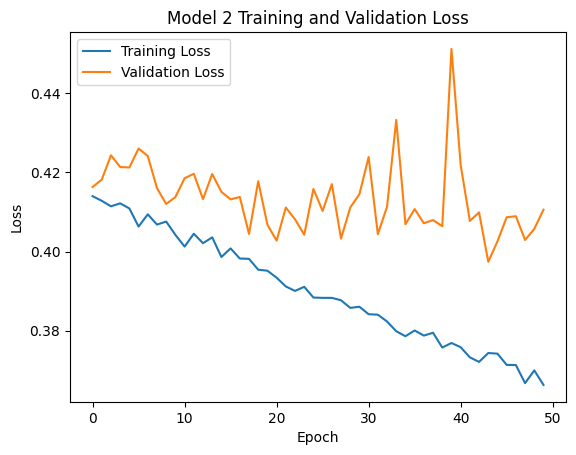

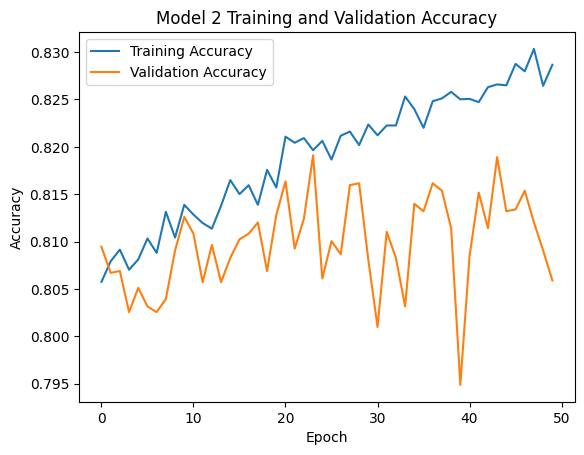

In [24]:
import os

# Create a new folder named "images" if it doesn't exist
if not os.path.exists("images"):
    os.makedirs("images")

def train_model():
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)
    return history

execution_time = timeit.timeit(train_model, number=1)
print("Total execution time:", execution_time, "seconds")

history = train_model()

loss2, accuracy2 = model.evaluate(X_test, y_test)
print("Test Loss:", loss2)
print("Test Accuracy:", accuracy2)

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model 2 Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.savefig(os.path.join("images", 'model 2 training_validation_loss.png'))
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model 2 Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.savefig(os.path.join("images", 'model 2 training_validation_accuracy.png'))
plt.show()


### Adding Dropuout Layer To Avoid Overfitting

In [25]:
from tensorflow.keras.layers import Dropout
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [26]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               1152      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 11521 (45.00 KB)
Trainable params: 11521

In [27]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Epoch 1/50
635/635 [==============================] - 5s 5ms/step - loss: 0.6431 - accuracy: 0.6235 - val_loss: 0.5911 - val_accuracy: 0.6975
Epoch 2/50
635/635 [==============================] - 4s 6ms/step - loss: 0.5751 - accuracy: 0.6975 - val_loss: 0.5230 - val_accuracy: 0.7433
Epoch 3/50
635/635 [==============================] - 4s 6ms/step - loss: 0.5271 - accuracy: 0.7403 - val_loss: 0.5285 - val_accuracy: 0.7358
Epoch 4/50
635/635 [==============================] - 3s 4ms/step - loss: 0.5067 - accuracy: 0.7517 - val_loss: 0.4792 - val_accuracy: 0.7720
Epoch 5/50
635/635 [==============================] - 4s 7ms/step - loss: 0.4917 - accuracy: 0.7643 - val_loss: 0.4687 - val_accuracy: 0.7775
Epoch 6/50
635/635 [==============================] - 3s 5ms/step - loss: 0.4894 - accuracy: 0.7636 - val_loss: 0.4837 - val_accuracy: 0.7639
Epoch 7/50
635/635 [==============================] - 3s 4ms/step - loss: 0.4819 - accuracy: 0.7727 - val_loss: 0.4638 - val_accuracy: 0.7760
Epoch 

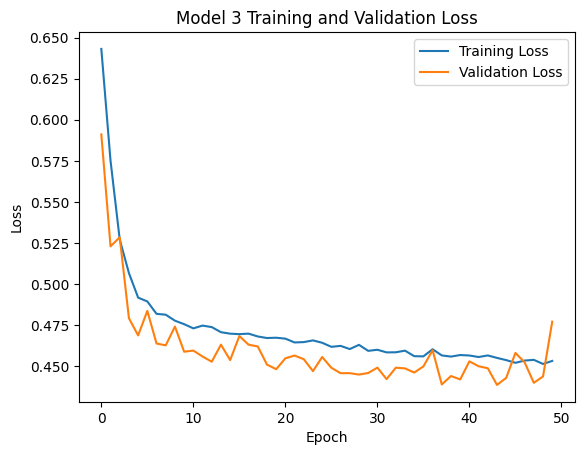

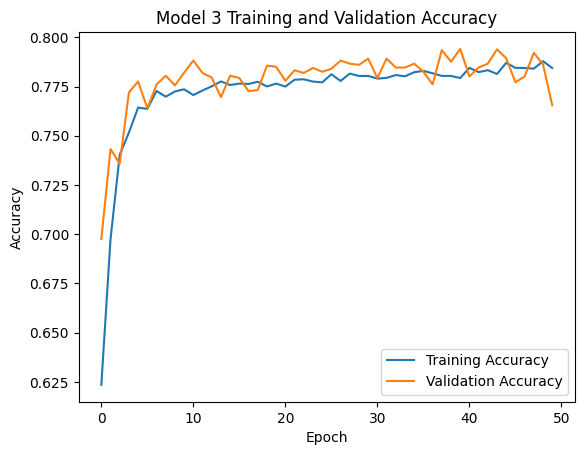

In [28]:
import os

# Create a new folder named "images" if it doesn't exist
if not os.path.exists("images"):
    os.makedirs("images")

def train_model():
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)
    return history

history = train_model()

loss3, accuracy3 = model.evaluate(X_test, y_test)
print("Test Loss:", loss3)
print("Test Accuracy:", accuracy3)

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model 3 Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.savefig(os.path.join("images", 'model 3 training_validation_loss.png'))
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model 3 Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.savefig(os.path.join("images", 'model 3 training_validation_accuracy.png'))
plt.show()


### Increase the layers 

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'), 
    Dense(1, activation='sigmoid')
])


In [30]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 128)               1152      
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_14 (Dense)            (None, 32)                2080      
                                                                 
 dropout_4 (Dropout)         (None, 32)                0         
                                                                 
 dense_15 (Dense)            (None, 16)               

In [31]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Epoch 1/50
635/635 [==============================] - 5s 6ms/step - loss: 0.6507 - accuracy: 0.6173 - val_loss: 0.5978 - val_accuracy: 0.6782
Epoch 2/50
635/635 [==============================] - 4s 6ms/step - loss: 0.5841 - accuracy: 0.6904 - val_loss: 0.5406 - val_accuracy: 0.7129
Epoch 3/50
635/635 [==============================] - 4s 7ms/step - loss: 0.5321 - accuracy: 0.7346 - val_loss: 0.4896 - val_accuracy: 0.7614
Epoch 4/50
635/635 [==============================] - 5s 9ms/step - loss: 0.5062 - accuracy: 0.7534 - val_loss: 0.4700 - val_accuracy: 0.7779
Epoch 5/50
635/635 [==============================] - 4s 6ms/step - loss: 0.4944 - accuracy: 0.7621 - val_loss: 0.4744 - val_accuracy: 0.7793
Epoch 6/50
635/635 [==============================] - 3s 5ms/step - loss: 0.4905 - accuracy: 0.7660 - val_loss: 0.4659 - val_accuracy: 0.7758
Epoch 7/50
635/635 [==============================] - 3s 5ms/step - loss: 0.4856 - accuracy: 0.7667 - val_loss: 0.4634 - val_accuracy: 0.7852
Epoch 

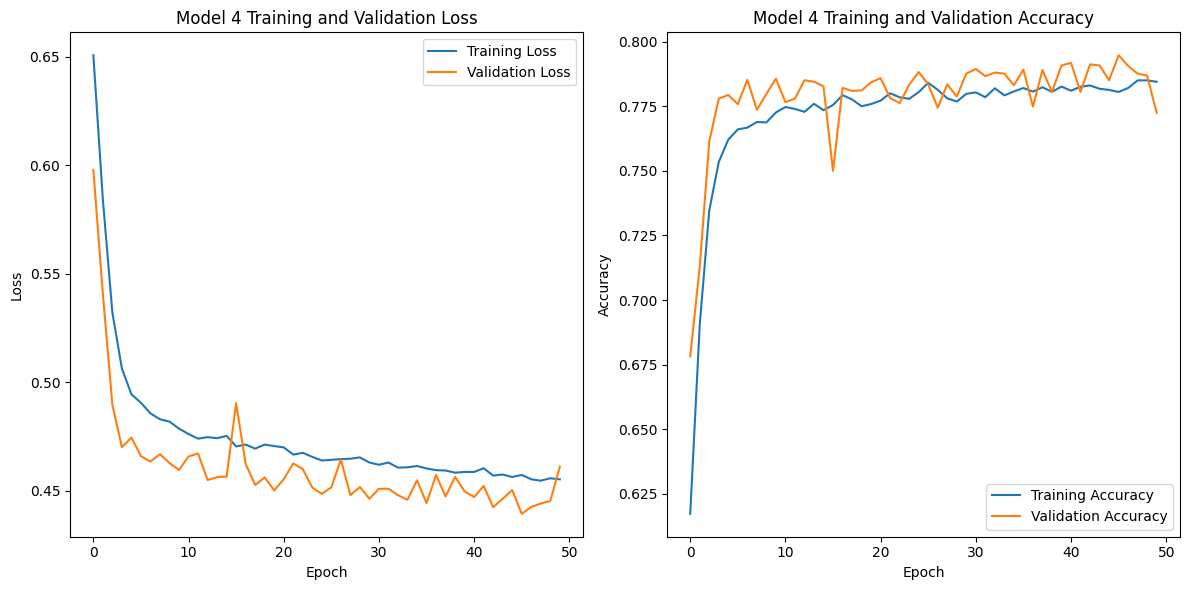

In [32]:
import os
import timeit

# Create a new folder named "images" if it doesn't exist
if not os.path.exists("images"):
    os.makedirs("images")

def train_model():
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)
    return history

start_time = timeit.default_timer()
history = train_model()
execution_time = timeit.default_timer() - start_time
print("Total execution time:", execution_time, "seconds")

loss4, accuracy4 = model.evaluate(X_test, y_test)
print("Test Loss:", loss4)
print("Test Accuracy:", accuracy4)

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model 4 Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.savefig(os.path.join("images", 'model 4 training_validation_loss.png'))
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model 4 Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.savefig(os.path.join("images", 'model 4 training_validation_accuracy.png'))
plt.show()


### Increase the epochs

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'), 
    Dense(1, activation='sigmoid')
])


In [34]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 128)               1152      
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_18 (Dense)            (None, 64)                8256      
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_19 (Dense)            (None, 32)                2080      
                                                                 
 dropout_7 (Dropout)         (None, 32)                0         
                                                                 
 dense_20 (Dense)            (None, 16)               

In [35]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Epoch 1/100
318/318 [==============================] - 4s 6ms/step - loss: 0.6588 - accuracy: 0.6040 - val_loss: 0.6062 - val_accuracy: 0.6613
Epoch 2/100
318/318 [==============================] - 2s 5ms/step - loss: 0.6070 - accuracy: 0.6618 - val_loss: 0.5653 - val_accuracy: 0.7025
Epoch 3/100
318/318 [==============================] - 2s 6ms/step - loss: 0.5651 - accuracy: 0.7083 - val_loss: 0.5244 - val_accuracy: 0.7444
Epoch 4/100
318/318 [==============================] - 2s 6ms/step - loss: 0.5320 - accuracy: 0.7383 - val_loss: 0.4876 - val_accuracy: 0.7626
Epoch 5/100
318/318 [==============================] - 2s 7ms/step - loss: 0.5103 - accuracy: 0.7551 - val_loss: 0.4922 - val_accuracy: 0.7630
Epoch 6/100
318/318 [==============================] - 2s 5ms/step - loss: 0.4984 - accuracy: 0.7637 - val_loss: 0.4751 - val_accuracy: 0.7775
Epoch 7/100
318/318 [==============================] - 2s 6ms/step - loss: 0.4941 - accuracy: 0.7622 - val_loss: 0.4696 - val_accuracy: 0.7801

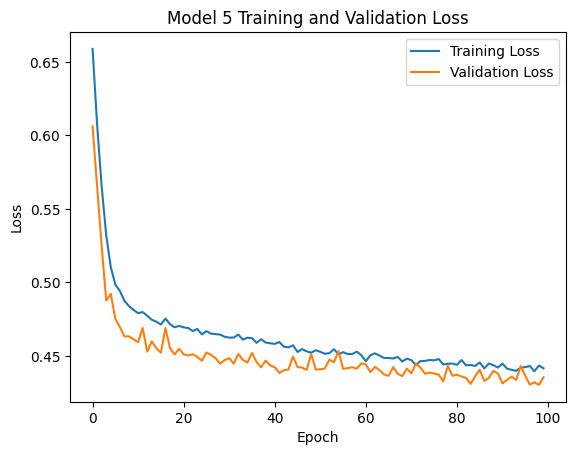

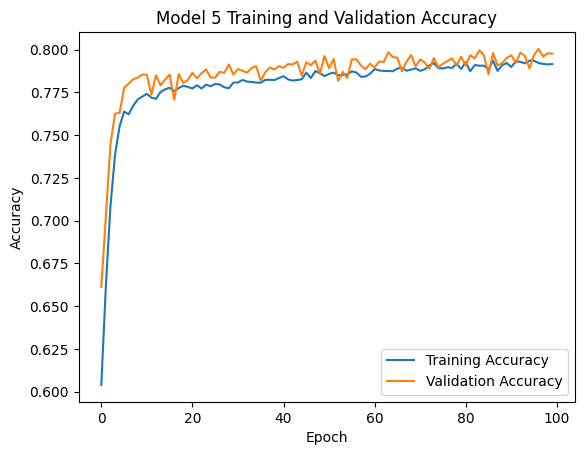

In [36]:
import os
import timeit

# Create a new folder named "images" if it doesn't exist
if not os.path.exists("images"):
    os.makedirs("images")

def train_model():
    history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.2)
    return history

start_time = timeit.default_timer()
history = train_model()
execution_time = timeit.default_timer() - start_time
print("Total execution time:", execution_time, "seconds")

loss5, accuracy5 = model.evaluate(X_test, y_test)
print("Test Loss:", loss5)
print("Test Accuracy:", accuracy5)

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model 5 Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.savefig(os.path.join("images", 'model 5 training_validation_loss.png'))
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model 5 Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.savefig(os.path.join("images", 'model 5 training_validation_accuracy.png'))
plt.show()

### Using ELU Activation

In [37]:
from tensorflow.keras.layers import ELU
model = Sequential([
    Dense(128, activation=ELU(), input_shape=(X_train.shape[1],)),
    Dropout(0.2), 
    Dense(64, activation=ELU()),
    Dropout(0.2),
    Dense(32, activation=ELU()),
    Dense(1, activation='sigmoid')
])


In [38]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 128)               1152      
                                                                 
 dropout_8 (Dropout)         (None, 128)               0         
                                                                 
 dense_23 (Dense)            (None, 64)                8256      
                                                                 
 dropout_9 (Dropout)         (None, 64)                0         
                                                                 
 dense_24 (Dense)            (None, 32)                2080      
                                                                 
 dense_25 (Dense)            (None, 1)                 33        
                                                                 
Total params: 11521 (45.00 KB)
Trainable params: 11521

In [39]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Epoch 1/50
318/318 [==============================] - 4s 5ms/step - loss: 0.6403 - accuracy: 0.6251 - val_loss: 0.6041 - val_accuracy: 0.6605
Epoch 2/50
318/318 [==============================] - 2s 5ms/step - loss: 0.5862 - accuracy: 0.6805 - val_loss: 0.5629 - val_accuracy: 0.7096
Epoch 3/50
318/318 [==============================] - 2s 5ms/step - loss: 0.5456 - accuracy: 0.7210 - val_loss: 0.5243 - val_accuracy: 0.7391
Epoch 4/50
318/318 [==============================] - 2s 6ms/step - loss: 0.5232 - accuracy: 0.7421 - val_loss: 0.5009 - val_accuracy: 0.7592
Epoch 5/50
318/318 [==============================] - 3s 9ms/step - loss: 0.5118 - accuracy: 0.7515 - val_loss: 0.4894 - val_accuracy: 0.7667
Epoch 6/50
318/318 [==============================] - 2s 5ms/step - loss: 0.5063 - accuracy: 0.7566 - val_loss: 0.5161 - val_accuracy: 0.7511
Epoch 7/50
318/318 [==============================] - 2s 5ms/step - loss: 0.5056 - accuracy: 0.7566 - val_loss: 0.4946 - val_accuracy: 0.7559
Epoch 

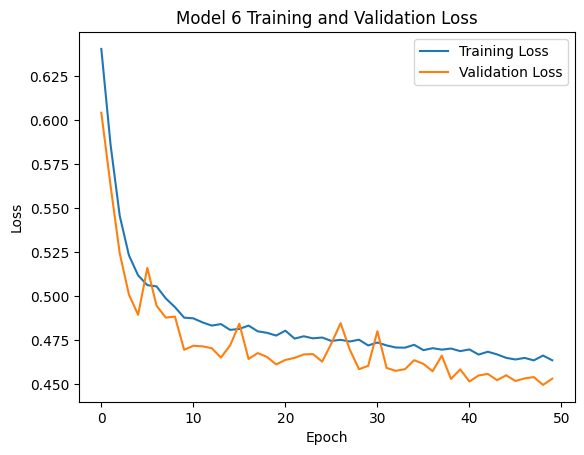

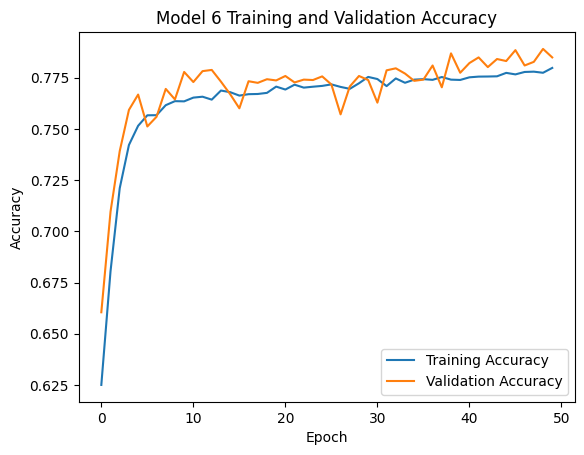

In [40]:
import os
import timeit

# Create a new folder named "images" if it doesn't exist
if not os.path.exists("images"):
    os.makedirs("images")

def train_model():
    history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.2)
    return history

start_time = timeit.default_timer()
history = train_model()
execution_time = timeit.default_timer() - start_time
print("Total execution time:", execution_time, "seconds")

loss6, accuracy6 = model.evaluate(X_test, y_test)
print("Test Loss:", loss6)
print("Test Accuracy:", accuracy6)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model 6 Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.savefig(os.path.join("images", 'model 6 training_validation_loss.png'))
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model 6 Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.savefig(os.path.join("images", 'model 6 training_validation_accuracy.png'))
plt.show()


### Using SGD activation 

In [41]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD

def elu(x):
    return tf.where(x >= 0, x, tf.exp(x) - 1)

# Create the model
model = Sequential([
    Dense(128, activation=elu, input_shape=(X_train.shape[1],)), 
    Dropout(0.2),                                                 
    Dense(64, activation=elu),                                   
    Dropout(0.2),                                                
    Dense(32, activation=elu),                                    
    Dense(16, activation=elu),                                    
    Dense(8, activation=elu),                                     
    Dense(1, activation='sigmoid')                                 
])

In [42]:
optimizer = SGD(learning_rate=0.01, momentum=0.9) 
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

Epoch 1/50
318/318 [==============================] - 3s 4ms/step - loss: 0.6612 - accuracy: 0.5994 - val_loss: 0.6306 - val_accuracy: 0.6211
Epoch 2/50
318/318 [==============================] - 3s 9ms/step - loss: 0.6269 - accuracy: 0.6267 - val_loss: 0.6159 - val_accuracy: 0.6329
Epoch 3/50
318/318 [==============================] - 3s 8ms/step - loss: 0.6146 - accuracy: 0.6378 - val_loss: 0.6064 - val_accuracy: 0.6382
Epoch 4/50
318/318 [==============================] - 2s 7ms/step - loss: 0.6077 - accuracy: 0.6486 - val_loss: 0.5906 - val_accuracy: 0.6737
Epoch 5/50
318/318 [==============================] - 2s 7ms/step - loss: 0.6022 - accuracy: 0.6567 - val_loss: 0.5881 - val_accuracy: 0.6786
Epoch 6/50
318/318 [==============================] - 2s 7ms/step - loss: 0.5951 - accuracy: 0.6647 - val_loss: 0.5792 - val_accuracy: 0.6757
Epoch 7/50
318/318 [==============================] - 3s 9ms/step - loss: 0.5963 - accuracy: 0.6637 - val_loss: 0.5889 - val_accuracy: 0.6662
Epoch 

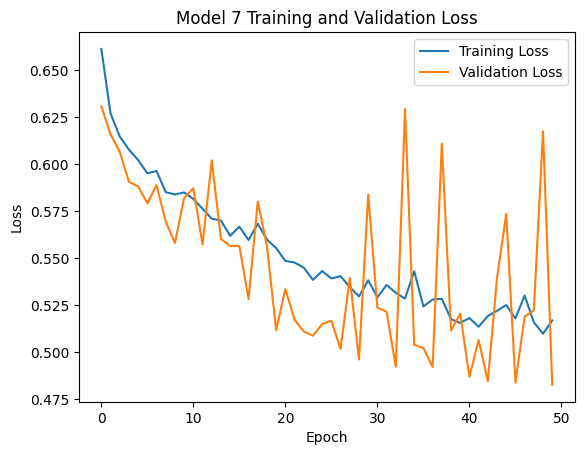

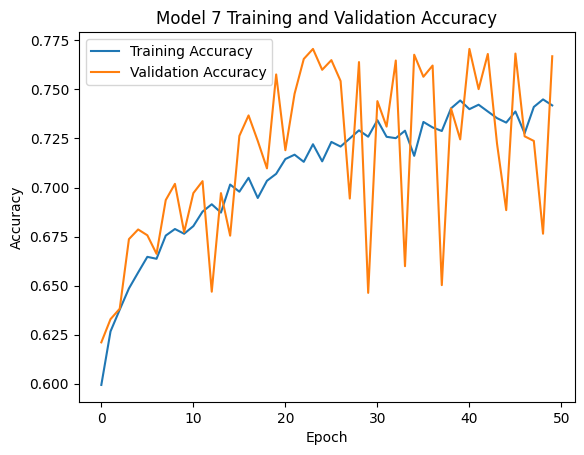

In [43]:
import os
import timeit

# Create a new folder named "images" if it doesn't exist
if not os.path.exists("images"):
    os.makedirs("images")

def train_model():
    history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.2)
    return history

start_time = timeit.default_timer()
history = train_model()
execution_time = timeit.default_timer() - start_time
print("Total execution time:", execution_time, "seconds")

loss7, accuracy7 = model.evaluate(X_test, y_test)
print("Test Loss:", loss7)
print("Test Accuracy:", accuracy7)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model 7 Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.savefig(os.path.join("images", 'model 7 training_validation_loss.png'))
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model 7 Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.savefig(os.path.join("images", 'model 7 training_validation_accuracy.png'))
plt.show()


### Using RMSprop activation

In [44]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
def relu(x):
    return tf.maximum(0.0, x)

# Create the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # Layer 1 with ReLU activation
    Dropout(0.2),                                                     # Dropout layer
    Dense(64, activation='relu'),                                    # Layer 2 with ReLU activation
    Dropout(0.2),                                                     # Dropout layer
    Dense(32, activation='relu'),                                    # Layer 3 with ReLU activation
    Dense(16, activation='relu'),                                    # Layer 4 with ReLU activation
    Dense(8, activation='relu'),                                     # Layer 5 with ReLU activation
    Dense(1, activation='sigmoid')                                   # Output layer with sigmoid activation
])

In [45]:
optimizer = RMSprop(learning_rate=0.001) 

In [46]:
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

Epoch 1/50
318/318 [==============================] - 4s 8ms/step - loss: 0.6554 - accuracy: 0.6121 - val_loss: 0.6136 - val_accuracy: 0.6528
Epoch 2/50
318/318 [==============================] - 2s 6ms/step - loss: 0.6051 - accuracy: 0.6682 - val_loss: 0.5892 - val_accuracy: 0.6855
Epoch 3/50
318/318 [==============================] - 2s 8ms/step - loss: 0.5682 - accuracy: 0.7003 - val_loss: 0.5688 - val_accuracy: 0.7121
Epoch 4/50
318/318 [==============================] - 3s 8ms/step - loss: 0.5343 - accuracy: 0.7332 - val_loss: 0.4973 - val_accuracy: 0.7582
Epoch 5/50
318/318 [==============================] - 3s 8ms/step - loss: 0.5161 - accuracy: 0.7465 - val_loss: 0.5551 - val_accuracy: 0.7188
Epoch 6/50
318/318 [==============================] - 2s 8ms/step - loss: 0.5031 - accuracy: 0.7566 - val_loss: 0.4751 - val_accuracy: 0.7691
Epoch 7/50
318/318 [==============================] - 2s 7ms/step - loss: 0.4967 - accuracy: 0.7615 - val_loss: 0.4670 - val_accuracy: 0.7779
Epoch 

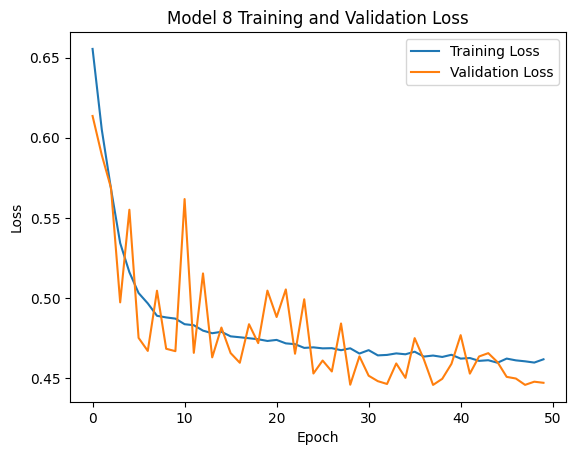

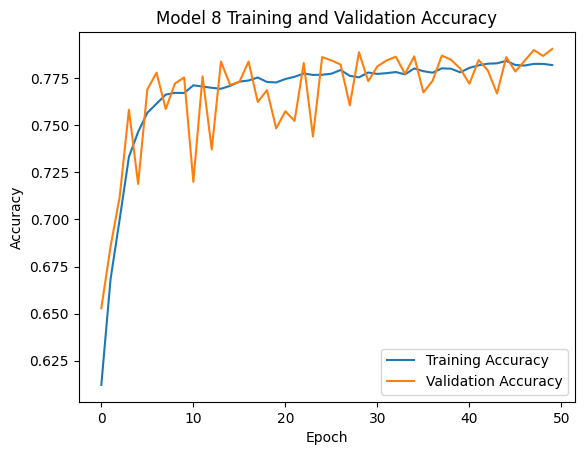

In [47]:
import os
import timeit

# Create a new folder named "images" if it doesn't exist
if not os.path.exists("images"):
    os.makedirs("images")

def train_model():
    history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.2)
    return history

start_time = timeit.default_timer()
history = train_model()
execution_time = timeit.default_timer() - start_time
print("Total execution time:", execution_time, "seconds")

loss8, accuracy8 = model.evaluate(X_test, y_test)
print("Test Loss:", loss8)
print("Test Accuracy:", accuracy8)

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model 8 Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.savefig(os.path.join("images", 'model 8 training_validation_loss.png'))
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model 8 Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.savefig(os.path.join("images", 'model 8 training_validation_accuracy.png'))
plt.show()


### Using Nadam with relu

In [48]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Nadam
def relu(x):
    return tf.maximum(0.0, x)

# Create the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)), 
    Dropout(0.2),                                                     
    Dense(64, activation='relu'),                                  
    Dropout(0.2),                                                     
    Dense(32, activation='relu'),                                    
    Dense(16, activation='relu'),                                   
    Dense(8, activation='relu'),                                     
    Dense(1, activation='sigmoid')                                   
])


In [49]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_38 (Dense)            (None, 128)               1152      
                                                                 
 dropout_14 (Dropout)        (None, 128)               0         
                                                                 
 dense_39 (Dense)            (None, 64)                8256      
                                                                 
 dropout_15 (Dropout)        (None, 64)                0         
                                                                 
 dense_40 (Dense)            (None, 32)                2080      
                                                                 
 dense_41 (Dense)            (None, 16)                528       
                                                                 
 dense_42 (Dense)            (None, 8)                

In [50]:
optimizer = Nadam(learning_rate=0.01)  
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

Epoch 1/50
318/318 [==============================] - 5s 6ms/step - loss: 0.6035 - accuracy: 0.6601 - val_loss: 0.5213 - val_accuracy: 0.7436
Epoch 2/50
318/318 [==============================] - 2s 5ms/step - loss: 0.5266 - accuracy: 0.7419 - val_loss: 0.4978 - val_accuracy: 0.7643
Epoch 3/50
318/318 [==============================] - 2s 8ms/step - loss: 0.5108 - accuracy: 0.7510 - val_loss: 0.5095 - val_accuracy: 0.7340
Epoch 4/50
318/318 [==============================] - 3s 9ms/step - loss: 0.5087 - accuracy: 0.7515 - val_loss: 0.4936 - val_accuracy: 0.7549
Epoch 5/50
318/318 [==============================] - 2s 5ms/step - loss: 0.5103 - accuracy: 0.7497 - val_loss: 0.4723 - val_accuracy: 0.7771
Epoch 6/50
318/318 [==============================] - 2s 6ms/step - loss: 0.5032 - accuracy: 0.7568 - val_loss: 0.4869 - val_accuracy: 0.7641
Epoch 7/50
318/318 [==============================] - 2s 7ms/step - loss: 0.4982 - accuracy: 0.7592 - val_loss: 0.4997 - val_accuracy: 0.7547
Epoch 

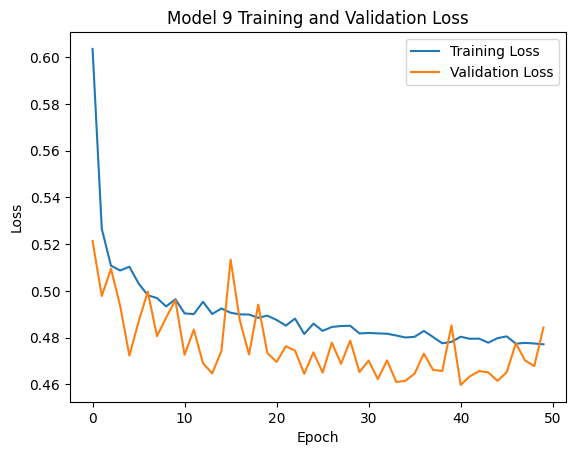

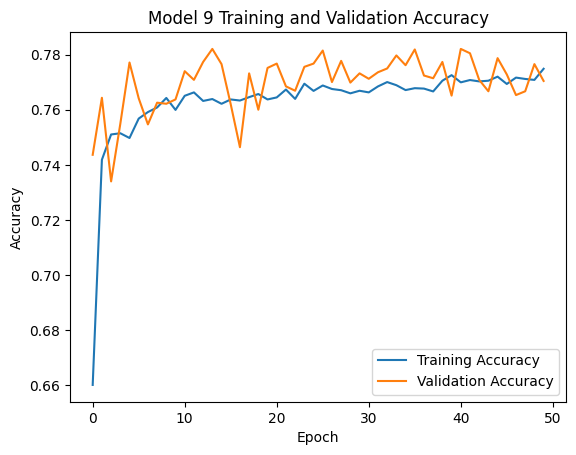

In [51]:
import os
import timeit

# Create a new folder named "images" if it doesn't exist
if not os.path.exists("images"):
    os.makedirs("images")

def train_model():
    history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.2)
    return history

start_time = timeit.default_timer()
history = train_model()
execution_time = timeit.default_timer() - start_time
print("Total execution time:", execution_time, "seconds")

loss9, accuracy9 = model.evaluate(X_test, y_test)
print("Test Loss:", loss9)
print("Test Accuracy:", accuracy9)

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model 9 Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.savefig(os.path.join("images", 'model 9 training_validation_loss.png'))
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model 9 Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.savefig(os.path.join("images", 'model 9 training_validation_accuracy.png'))
plt.show()


### Using tanh activation and adam optimizer

In [52]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Create the model
model = Sequential([
    Dense(128, activation='tanh', input_shape=(X_train.shape[1],)),  
    Dropout(0.2),                                                     
    Dense(64, activation='tanh'),                                  
    Dropout(0.2),                                                   
    Dense(32, activation='tanh'),                                 
    Dense(16, activation='tanh'),                                 
    Dense(8, activation='tanh'),                                   
    Dense(1, activation='sigmoid')                                  
])


In [53]:
optimizer = Adam() 
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

Epoch 1/50
318/318 [==============================] - 3s 6ms/step - loss: 0.6402 - accuracy: 0.6174 - val_loss: 0.6049 - val_accuracy: 0.6424
Epoch 2/50
318/318 [==============================] - 2s 7ms/step - loss: 0.5945 - accuracy: 0.6660 - val_loss: 0.5782 - val_accuracy: 0.6832
Epoch 3/50
318/318 [==============================] - 2s 7ms/step - loss: 0.5491 - accuracy: 0.7151 - val_loss: 0.5306 - val_accuracy: 0.7350
Epoch 4/50
318/318 [==============================] - 2s 6ms/step - loss: 0.5179 - accuracy: 0.7435 - val_loss: 0.5018 - val_accuracy: 0.7496
Epoch 5/50
318/318 [==============================] - 2s 6ms/step - loss: 0.5064 - accuracy: 0.7515 - val_loss: 0.4902 - val_accuracy: 0.7653
Epoch 6/50
318/318 [==============================] - 2s 6ms/step - loss: 0.4998 - accuracy: 0.7583 - val_loss: 0.4834 - val_accuracy: 0.7657
Epoch 7/50
318/318 [==============================] - 2s 6ms/step - loss: 0.4952 - accuracy: 0.7610 - val_loss: 0.4771 - val_accuracy: 0.7704
Epoch 

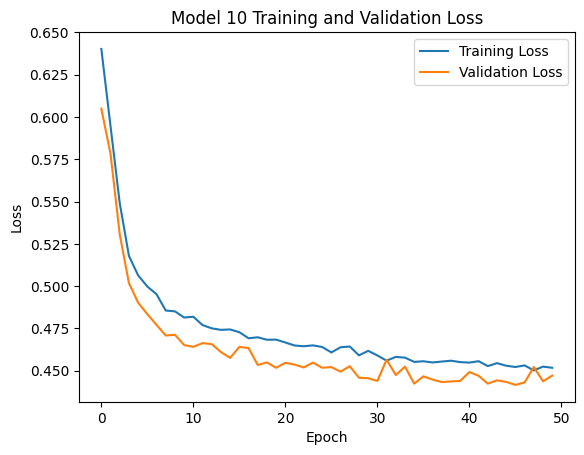

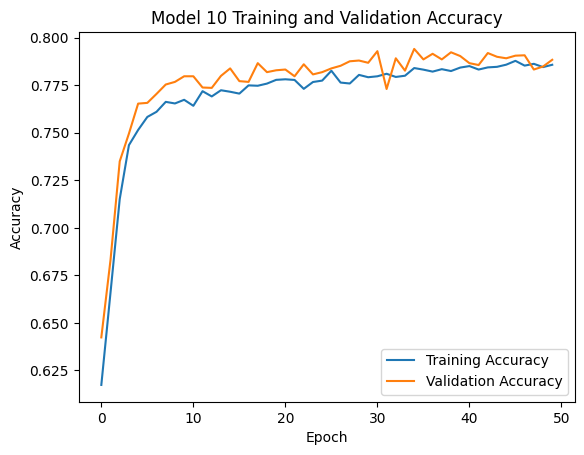

In [54]:
import os
import timeit

# Create a new folder named "images" if it doesn't exist
if not os.path.exists("images"):
    os.makedirs("images")

def train_model():
    history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.2)
    return history

start_time = timeit.default_timer()
history = train_model()
execution_time = timeit.default_timer() - start_time
print("Total execution time:", execution_time, "seconds")

loss10, accuracy10 = model.evaluate(X_test, y_test)
print("Test Loss:", loss10)
print("Test Accuracy:", accuracy10)

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model 10 Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.savefig(os.path.join("images", 'model 10 training_validation_loss.png'))
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model 10 Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.savefig(os.path.join("images", 'model 10 training_validation_accuracy.png'))
plt.show()


### Using LeakyReLU activation and adam optimizer

In [55]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.optimizers import Adam

# Create the model
model = Sequential([
    Dense(128, activation=LeakyReLU(), input_shape=(X_train.shape[1],)), 
    Dropout(0.2),                                                         
    Dense(64, activation=LeakyReLU()),                                 
    Dropout(0.2),                                                        
    Dense(32, activation=LeakyReLU()),                                 
    Dense(16, activation=LeakyReLU()),                                    
    Dense(8, activation=LeakyReLU()),                                   
    Dense(1, activation='sigmoid')                                         
])


In [56]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_50 (Dense)            (None, 128)               1152      
                                                                 
 dropout_18 (Dropout)        (None, 128)               0         
                                                                 
 dense_51 (Dense)            (None, 64)                8256      
                                                                 
 dropout_19 (Dropout)        (None, 64)                0         
                                                                 
 dense_52 (Dense)            (None, 32)                2080      
                                                                 
 dense_53 (Dense)            (None, 16)                528       
                                                                 
 dense_54 (Dense)            (None, 8)               

In [57]:
optimizer = Adam()  
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

Epoch 1/50
318/318 [==============================] - 4s 6ms/step - loss: 0.6416 - accuracy: 0.6199 - val_loss: 0.5906 - val_accuracy: 0.6814
Epoch 2/50
318/318 [==============================] - 2s 5ms/step - loss: 0.5789 - accuracy: 0.6891 - val_loss: 0.5353 - val_accuracy: 0.7312
Epoch 3/50
318/318 [==============================] - 2s 7ms/step - loss: 0.5375 - accuracy: 0.7284 - val_loss: 0.5233 - val_accuracy: 0.7281
Epoch 4/50
318/318 [==============================] - 2s 5ms/step - loss: 0.5104 - accuracy: 0.7515 - val_loss: 0.4804 - val_accuracy: 0.7726
Epoch 5/50
318/318 [==============================] - 3s 9ms/step - loss: 0.5025 - accuracy: 0.7584 - val_loss: 0.4801 - val_accuracy: 0.7708
Epoch 6/50
318/318 [==============================] - 2s 7ms/step - loss: 0.4889 - accuracy: 0.7647 - val_loss: 0.5010 - val_accuracy: 0.7521
Epoch 7/50
318/318 [==============================] - 2s 5ms/step - loss: 0.4899 - accuracy: 0.7654 - val_loss: 0.4650 - val_accuracy: 0.7779
Epoch 

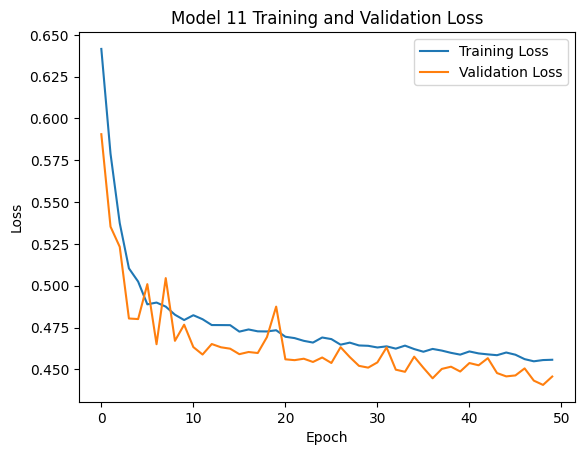

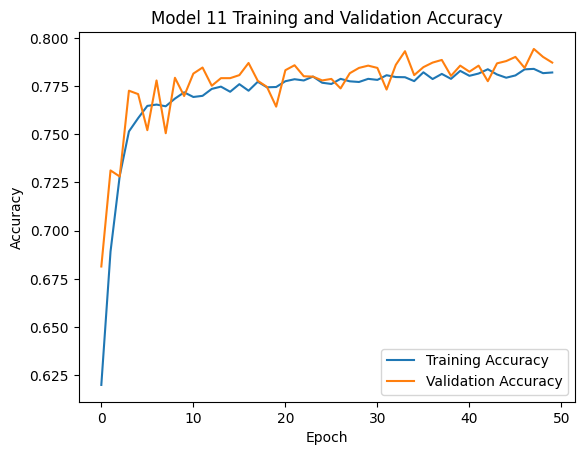

In [58]:
import os
import timeit

# Create a new folder named "images" if it doesn't exist
if not os.path.exists("images"):
    os.makedirs("images")

def train_model():
    history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.2)
    return history

start_time = timeit.default_timer()
history = train_model()
execution_time = timeit.default_timer() - start_time
print("Total execution time:", execution_time, "seconds")

loss11, accuracy11 = model.evaluate(X_test, y_test)
print("Test Loss:", loss11)
print("Test Accuracy:", accuracy11)

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model 11 Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.savefig(os.path.join("images", 'model 11 training_validation_loss.png'))
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model 11 Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.savefig(os.path.join("images", 'model 11 training_validation_accuracy.png'))
plt.show()


### Using Softmax activation and adam optimizer


In [59]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='softmax')  
])


In [60]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_56 (Dense)            (None, 128)               1152      
                                                                 
 dense_57 (Dense)            (None, 64)                8256      
                                                                 
 dense_58 (Dense)            (None, 32)                2080      
                                                                 
 dense_59 (Dense)            (None, 16)                528       
                                                                 
 dense_60 (Dense)            (None, 8)                 136       
                                                                 
 dense_61 (Dense)            (None, 1)                 9         
                                                                 
Total params: 12161 (47.50 KB)
Trainable params: 1216

In [61]:
optimizer = Adam(learning_rate=0.001)  
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

Epoch 1/50
318/318 [==============================] - 5s 7ms/step - loss: 0.6269 - accuracy: 0.4224 - val_loss: 0.5760 - val_accuracy: 0.4331
Epoch 2/50
318/318 [==============================] - 3s 8ms/step - loss: 0.5480 - accuracy: 0.4224 - val_loss: 0.5142 - val_accuracy: 0.4331
Epoch 3/50
318/318 [==============================] - 3s 9ms/step - loss: 0.5097 - accuracy: 0.4224 - val_loss: 0.5307 - val_accuracy: 0.4331
Epoch 4/50
318/318 [==============================] - 1s 5ms/step - loss: 0.4932 - accuracy: 0.4224 - val_loss: 0.4774 - val_accuracy: 0.4331
Epoch 5/50
318/318 [==============================] - 2s 8ms/step - loss: 0.4865 - accuracy: 0.4224 - val_loss: 0.4748 - val_accuracy: 0.4331
Epoch 6/50
318/318 [==============================] - 3s 10ms/step - loss: 0.4807 - accuracy: 0.4224 - val_loss: 0.4624 - val_accuracy: 0.4331
Epoch 7/50
318/318 [==============================] - 3s 10ms/step - loss: 0.4753 - accuracy: 0.4224 - val_loss: 0.4872 - val_accuracy: 0.4331
Epoc

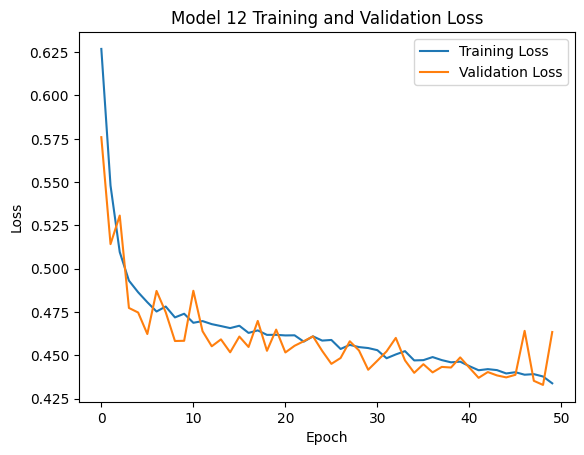

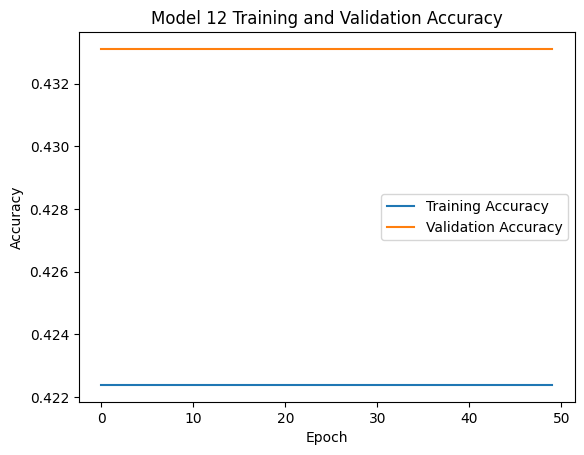

In [62]:
import os
import timeit

# Create a new folder named "images" if it doesn't exist
if not os.path.exists("images"):
    os.makedirs("images")

def train_model():
    history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.2)
    return history

start_time = timeit.default_timer()
history = train_model()
execution_time = timeit.default_timer() - start_time
print("Total execution time:", execution_time, "seconds")

loss12, accuracy12 = model.evaluate(X_test, y_test)
print("Test Loss:", loss12)
print("Test Accuracy:", accuracy12)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model 12 Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.savefig(os.path.join("images", 'model 12 training_validation_loss.png'))
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model 12 Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.savefig(os.path.join("images", 'model 12 training_validation_accuracy.png'))
plt.show()


### Using combination of different activations with Nadam Optimizer

In [63]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Nadam

# Create the model
model = Sequential([
    Dense(128, activation='sigmoid', input_shape=(X_train.shape[1],)),  
    Dropout(0.2),                                                        
    Dense(64, activation='tanh'),                                     
    Dropout(0.2),                                                       
    Dense(32, activation=tf.nn.leaky_relu),                            
    Dense(16, activation='tanh'),                                    
    Dense(8, activation=tf.exp),                                        
    Dense(1, activation='sigmoid')                                       
])



In [64]:
optimizer = Nadam()  
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

Epoch 1/50
318/318 [==============================] - 4s 6ms/step - loss: 0.6994 - accuracy: 0.5692 - val_loss: 0.6824 - val_accuracy: 0.5669
Epoch 2/50
318/318 [==============================] - 2s 5ms/step - loss: 0.6788 - accuracy: 0.5773 - val_loss: 0.6732 - val_accuracy: 0.5673
Epoch 3/50
318/318 [==============================] - 2s 6ms/step - loss: 0.6579 - accuracy: 0.5991 - val_loss: 0.6365 - val_accuracy: 0.6128
Epoch 4/50
318/318 [==============================] - 2s 6ms/step - loss: 0.6362 - accuracy: 0.6142 - val_loss: 0.6424 - val_accuracy: 0.6300
Epoch 5/50
318/318 [==============================] - 2s 6ms/step - loss: 0.6293 - accuracy: 0.6221 - val_loss: 0.6159 - val_accuracy: 0.6408
Epoch 6/50
318/318 [==============================] - 2s 6ms/step - loss: 0.6169 - accuracy: 0.6375 - val_loss: 0.6018 - val_accuracy: 0.6471
Epoch 7/50
318/318 [==============================] - 2s 5ms/step - loss: 0.6106 - accuracy: 0.6493 - val_loss: 0.6009 - val_accuracy: 0.6300
Epoch 

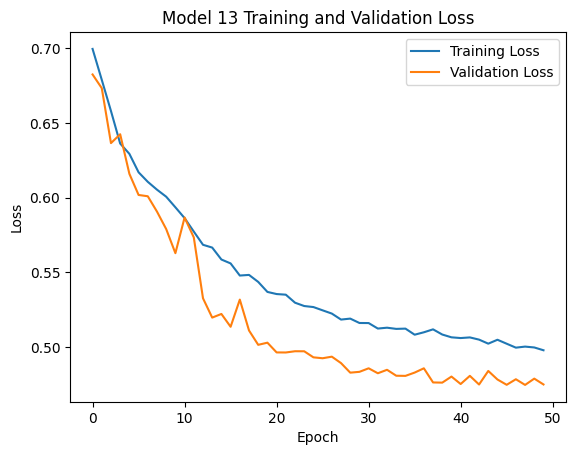

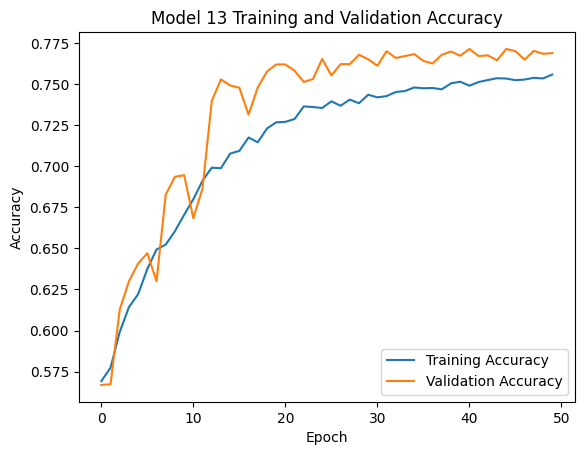

In [65]:
import os
import timeit

# Create a new folder named "images" if it doesn't exist
if not os.path.exists("images"):
    os.makedirs("images")

def train_model():
    history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.2)
    return history

start_time = timeit.default_timer()
history = train_model()
execution_time = timeit.default_timer() - start_time
print("Total execution time:", execution_time, "seconds")

loss13, accuracy13 = model.evaluate(X_test, y_test)
print("Test Loss:", loss13)
print("Test Accuracy:", accuracy13)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model 13 Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.savefig(os.path.join("images", 'model 13 training_validation_loss.png'))
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model 13 Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.savefig(os.path.join("images", 'model 13 training_validation_accuracy.png'))
plt.show()

### Using combination of different activations with Adam Optimizer

In [66]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Nadam

# Create the model
model = Sequential([
    Dense(128, activation='sigmoid', input_shape=(X_train.shape[1],)), 
    Dropout(0.2),                                                        
    Dense(64, activation='tanh'),                                    
    Dropout(0.2),                                                        
    Dense(32, activation=tf.nn.leaky_relu),                            
    Dense(16, activation='tanh'),                                    
    Dense(8, activation=tf.exp),                                      
    Dense(1, activation='sigmoid')                                     
])



In [67]:
optimizer = Adam() 
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

Epoch 1/50
318/318 [==============================] - 3s 5ms/step - loss: 0.6866 - accuracy: 0.5724 - val_loss: 0.6841 - val_accuracy: 0.5669
Epoch 2/50
318/318 [==============================] - 2s 5ms/step - loss: 0.6772 - accuracy: 0.5803 - val_loss: 0.6609 - val_accuracy: 0.5799
Epoch 3/50
318/318 [==============================] - 2s 8ms/step - loss: 0.6413 - accuracy: 0.6085 - val_loss: 0.6288 - val_accuracy: 0.6179
Epoch 4/50
318/318 [==============================] - 2s 5ms/step - loss: 0.6259 - accuracy: 0.6236 - val_loss: 0.6088 - val_accuracy: 0.6124
Epoch 5/50
318/318 [==============================] - 2s 5ms/step - loss: 0.6184 - accuracy: 0.6296 - val_loss: 0.6011 - val_accuracy: 0.6483
Epoch 6/50
318/318 [==============================] - 1s 5ms/step - loss: 0.6137 - accuracy: 0.6375 - val_loss: 0.5966 - val_accuracy: 0.6560
Epoch 7/50
318/318 [==============================] - 2s 5ms/step - loss: 0.6078 - accuracy: 0.6480 - val_loss: 0.5957 - val_accuracy: 0.6670
Epoch 

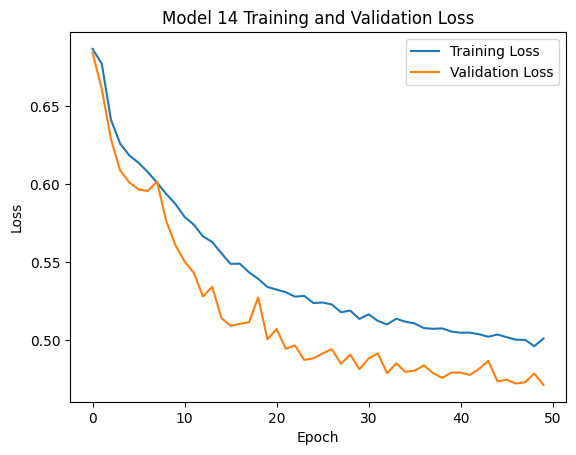

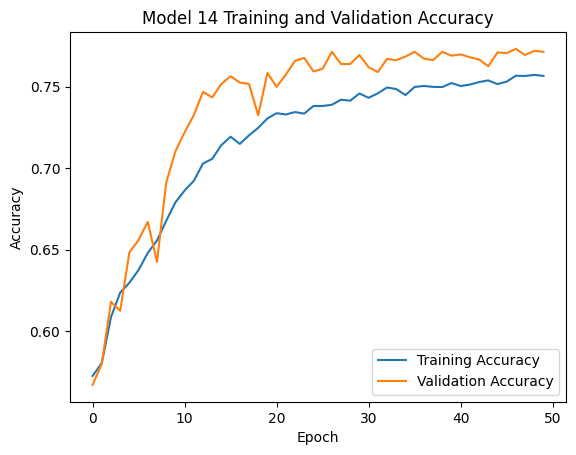

In [68]:
import os
import timeit
import matplotlib.pyplot as plt

# Create a new folder named "images" if it doesn't exist
if not os.path.exists("images"):
    os.makedirs("images")

def train_model():
    history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.2)
    return history

start_time = timeit.default_timer()
history = train_model()
execution_time = timeit.default_timer() - start_time
print("Total execution time:", execution_time, "seconds")

loss14, accuracy14 = model.evaluate(X_test, y_test)
print("Test Loss:", loss14)
print("Test Accuracy:", accuracy14)

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model 14 Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.savefig(os.path.join("images", 'model 14 training_validation_loss.png'))
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model 14 Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.savefig(os.path.join("images", 'model 14 training_validation_accuracy.png'))
plt.show()


### Training tanh on 100 epochs with Adam optimizer

In [69]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Create the model
model = Sequential([
    Dense(128, activation='tanh', input_shape=(X_train.shape[1],)), 
    Dropout(0.2),                                                     
    Dense(64, activation='tanh'),                                  
    Dropout(0.2),                                                   
    Dense(32, activation='tanh'),                                  
    Dense(16, activation='tanh'),                                   
    Dense(8, activation='tanh'),                                    
    Dense(1, activation='sigmoid')                                  
])


In [70]:
optimizer = Adam()
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

Epoch 1/100
318/318 [==============================] - 5s 8ms/step - loss: 0.6387 - accuracy: 0.6251 - val_loss: 0.5898 - val_accuracy: 0.6780
Epoch 2/100
318/318 [==============================] - 3s 9ms/step - loss: 0.5812 - accuracy: 0.6875 - val_loss: 0.5411 - val_accuracy: 0.7265
Epoch 3/100
318/318 [==============================] - 3s 9ms/step - loss: 0.5368 - accuracy: 0.7290 - val_loss: 0.5246 - val_accuracy: 0.7417
Epoch 4/100
318/318 [==============================] - 3s 10ms/step - loss: 0.5161 - accuracy: 0.7463 - val_loss: 0.5077 - val_accuracy: 0.7511
Epoch 5/100
318/318 [==============================] - 3s 10ms/step - loss: 0.5043 - accuracy: 0.7534 - val_loss: 0.4813 - val_accuracy: 0.7722
Epoch 6/100
318/318 [==============================] - 3s 9ms/step - loss: 0.4980 - accuracy: 0.7579 - val_loss: 0.4803 - val_accuracy: 0.7718
Epoch 7/100
318/318 [==============================] - 3s 9ms/step - loss: 0.4935 - accuracy: 0.7611 - val_loss: 0.4835 - val_accuracy: 0.76

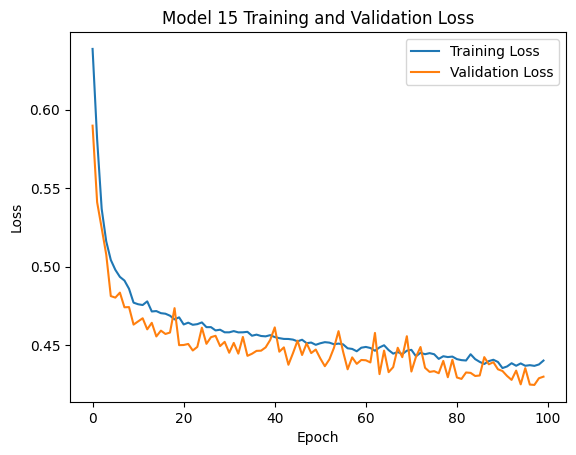

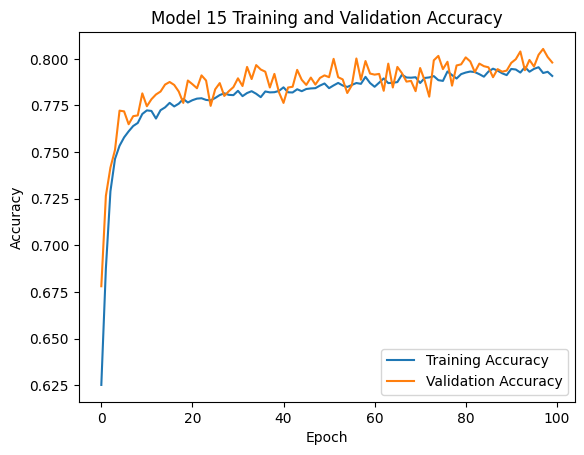

In [71]:
import os
import timeit
import matplotlib.pyplot as plt

# Create a new folder named "images" if it doesn't exist
if not os.path.exists("images"):
    os.makedirs("images")

def train_model():
    history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.2)
    return history

start_time = timeit.default_timer()
history = train_model()
execution_time = timeit.default_timer() - start_time
print("Total execution time:", execution_time, "seconds")

loss15, accuracy15 = model.evaluate(X_test, y_test)
print("Test Loss:", loss15)
print("Test Accuracy:", accuracy15)

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model 15 Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.savefig(os.path.join("images", 'model 15 training_validation_loss.png'))
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model 15 Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.savefig(os.path.join("images", 'model 15 training_validation_accuracy.png'))
plt.show()


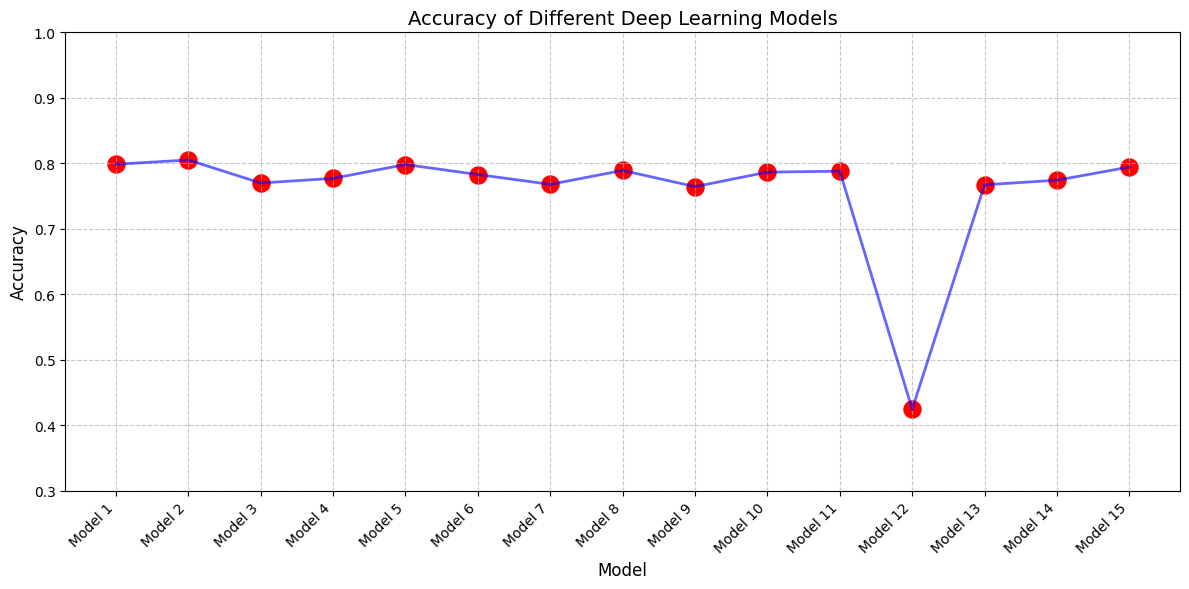

In [72]:
import matplotlib.pyplot as plt

model_names = ["Model 1", "Model 2", "Model 3", "Model 4", "Model 5", 
               "Model 6", "Model 7", "Model 8", "Model 9", "Model 10", 
               "Model 11", "Model 12", "Model 13", "Model 14", "Model 15"]

accuracies = [accuracy1, accuracy2, accuracy3, accuracy4, accuracy5, accuracy6,
              accuracy7, accuracy8, accuracy9, accuracy10, accuracy11, accuracy12,
              accuracy13, accuracy14, accuracy15]

plt.figure(figsize=(12, 6))
plt.scatter(model_names, accuracies, color='red', s=150, marker='o')
plt.plot(model_names, accuracies, color='blue', linewidth=2, alpha=0.6)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Accuracy of Different Deep Learning Models', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.ylim(0.3, 1.0)  
plt.grid(True, linestyle='--', alpha=0.7) 
plt.tight_layout()

# Save the plot as an image
plt.savefig("accuracy_comparison.png")

plt.show()


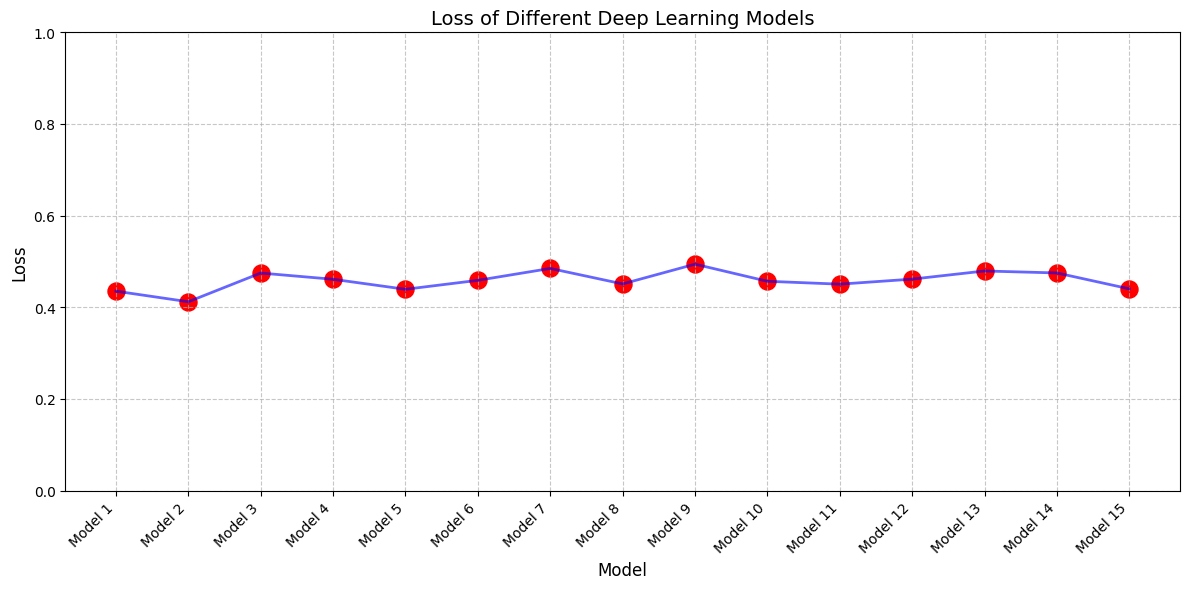

In [73]:
import matplotlib.pyplot as plt

model_names = ["Model 1", "Model 2", "Model 3", "Model 4", "Model 5", 
               "Model 6", "Model 7", "Model 8", "Model 9", "Model 10", 
               "Model 11", "Model 12", "Model 13", "Model 14", "Model 15"]
losses = [loss1, loss2, loss3, loss4, loss5, loss6,
          loss7, loss8, loss9, loss10, loss11, loss12,
          loss13, loss14, loss15]

plt.figure(figsize=(12, 6))
plt.scatter(model_names, losses, color='red', s=150, marker='o')
plt.plot(model_names, losses, color='blue', linewidth=2, alpha=0.6)

plt.xlabel('Model', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Loss of Different Deep Learning Models', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.ylim(0.0, 1.0) 
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Save the plot as an image
plt.savefig("loss_comparison.png")

plt.show()
